# 2 - CALIDAD DE DATOS

## IMPORTACIÓN DE PAQUETES

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns 

## IMPORTAR LOS DATOS

In [3]:
df = pd.read_csv('../../02_Datos/03_Trabajo/trabajo.csv', index_col= 0)

## CORRECCIÓN DE NOMBRES DE VARIABLES

No se tiene que realizar corrección de variables porque se han incluido manualmente en el set up.

## VISIÓN GENERAL

In [4]:
df.head()

,estacion,edad,e_infantil,acc_grave,int_quirurgica,fiebre_ult_any,frec_alcohol,fumar,hr_sentado,produccion
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
5,-0.33,0.67,1,0,1,0,0.8,0,0.50,N


### TIPO DE DATOS

In [5]:
df.dtypes

estacion          float64
edad              float64
e_infantil          int64
acc_grave           int64
int_quirurgica      int64
fiebre_ult_any      int64
frec_alcohol      float64
fumar               int64
hr_sentado        float64
produccion         object
dtype: object

In [6]:
df.produccion.value_counts()

N    61
O     9
Name: produccion, dtype: int64

**CONCLUSIÓN:** Los datos están bien estructurados y solo se tendría que transformar la target (produccion) a numérica

In [7]:
# Cambio los valores manualmente
df['produccion'] = df.produccion.replace({'N': 0, 'O':1 })
df.head()

,estacion,edad,e_infantil,acc_grave,int_quirurgica,fiebre_ult_any,frec_alcohol,fumar,hr_sentado,produccion
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,0
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,1
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,0
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,1
5,-0.33,0.67,1,0,1,0,0.8,0,0.50,0


### BALANCELO DE LA TARGET

In [8]:
df.produccion.value_counts(normalize= True) * 100

0    87.142857
1    12.857143
Name: produccion, dtype: float64

Veremos cómo predice el dataset. Si vemos que no predice bien los casos alterados (1) tendremos que aumentar los casos mediante el balanceo del dataset.

### VALORES ÚNICOS

In [9]:
df.nunique()

estacion           4
edad              17
e_infantil         2
acc_grave          2
int_quirurgica     2
fiebre_ult_any     3
frec_alcohol       4
fumar              3
hr_sentado        11
produccion         2
dtype: int64

No hay valores únicos en el dataset

### VALORES DUPLICADOS

In [10]:
df.duplicated().sum()

0

No hay valores duplicados

### VALORES NULOS

In [11]:
df.isna().sum()

estacion          0
edad              0
e_infantil        0
acc_grave         0
int_quirurgica    0
fiebre_ult_any    0
frec_alcohol      0
fumar             0
hr_sentado        0
produccion        0
dtype: int64

No hay valores nulos en el dataset

## GESTIÓN DE NUMÉRICAS

Todas las variables del dataset son numéricas

### ESTADÍSTICOS Y GRÁFICOS DE LAS VARIABLES NUMÉRICAS

In [12]:
def estadisticos_cont(df_cat):
    #Calculamos describe
    estadisticos = df_cat.describe().T
    return(estadisticos)

estadisticos_cont(df)

,count,mean,std,min,25%,50%,75%,max
estacion,70.0,-0.151286,0.785336,-1.00,-1.000,-0.33,1.00,1.00
edad,70.0,0.664571,0.116042,0.50,0.565,0.67,0.75,0.94
e_infantil,70.0,0.885714,0.320455,0.00,1.000,1.00,1.00,1.00
acc_grave,70.0,0.457143,0.501757,0.00,0.000,0.00,1.00,1.00
int_quirurgica,70.0,0.471429,0.502787,0.00,0.000,0.00,1.00,1.00
fiebre_ult_any,70.0,0.185714,0.596921,-1.00,0.000,0.00,1.00,1.00
frec_alcohol,70.0,0.822857,0.161668,0.20,0.800,0.80,1.00,1.00
fumar,70.0,-0.357143,0.799197,-1.00,-1.000,-1.00,0.00,1.00
hr_sentado,70.0,0.403143,0.192621,0.06,0.250,0.38,0.50,1.00
produccion,70.0,0.128571,0.337142,0.00,0.000,0.00,0.00,1.00


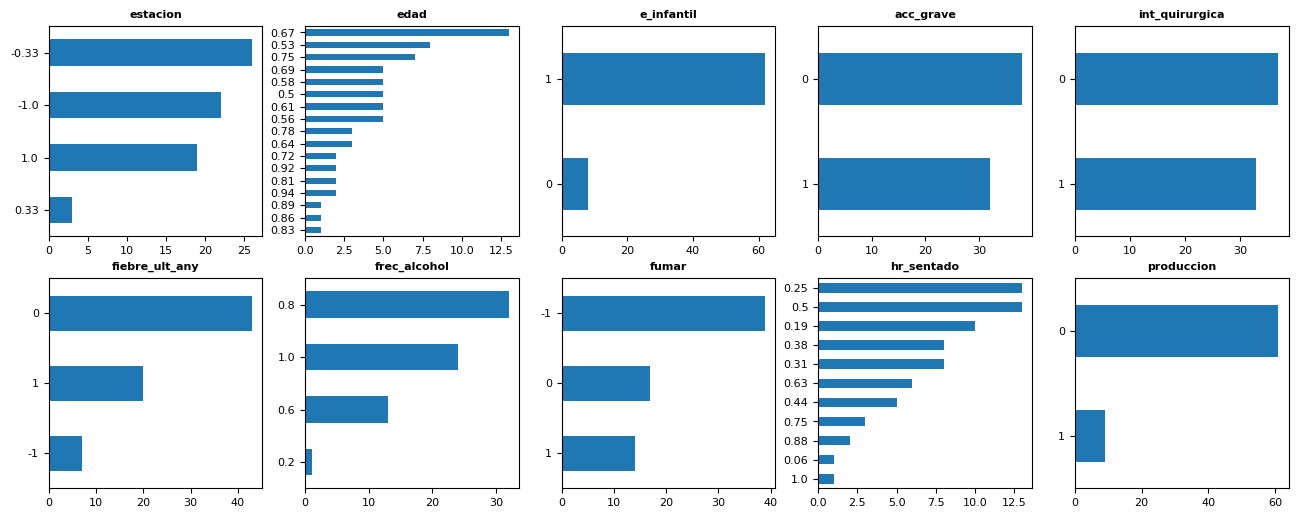

In [13]:
def graficos_eda_categoricos(df_cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(df_cat.shape[1] / 5)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 5, figsize = (16, filas * 3))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(df_cat):
        df_cat[variable].value_counts(ascending = True).plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 8, fontweight = "bold")
        ax[cada].tick_params(labelsize = 8)
                
graficos_eda_categoricos(df)

### GESTIÓN DE ATÍPICOS

No vamos a gestionar atípicos

## EDA

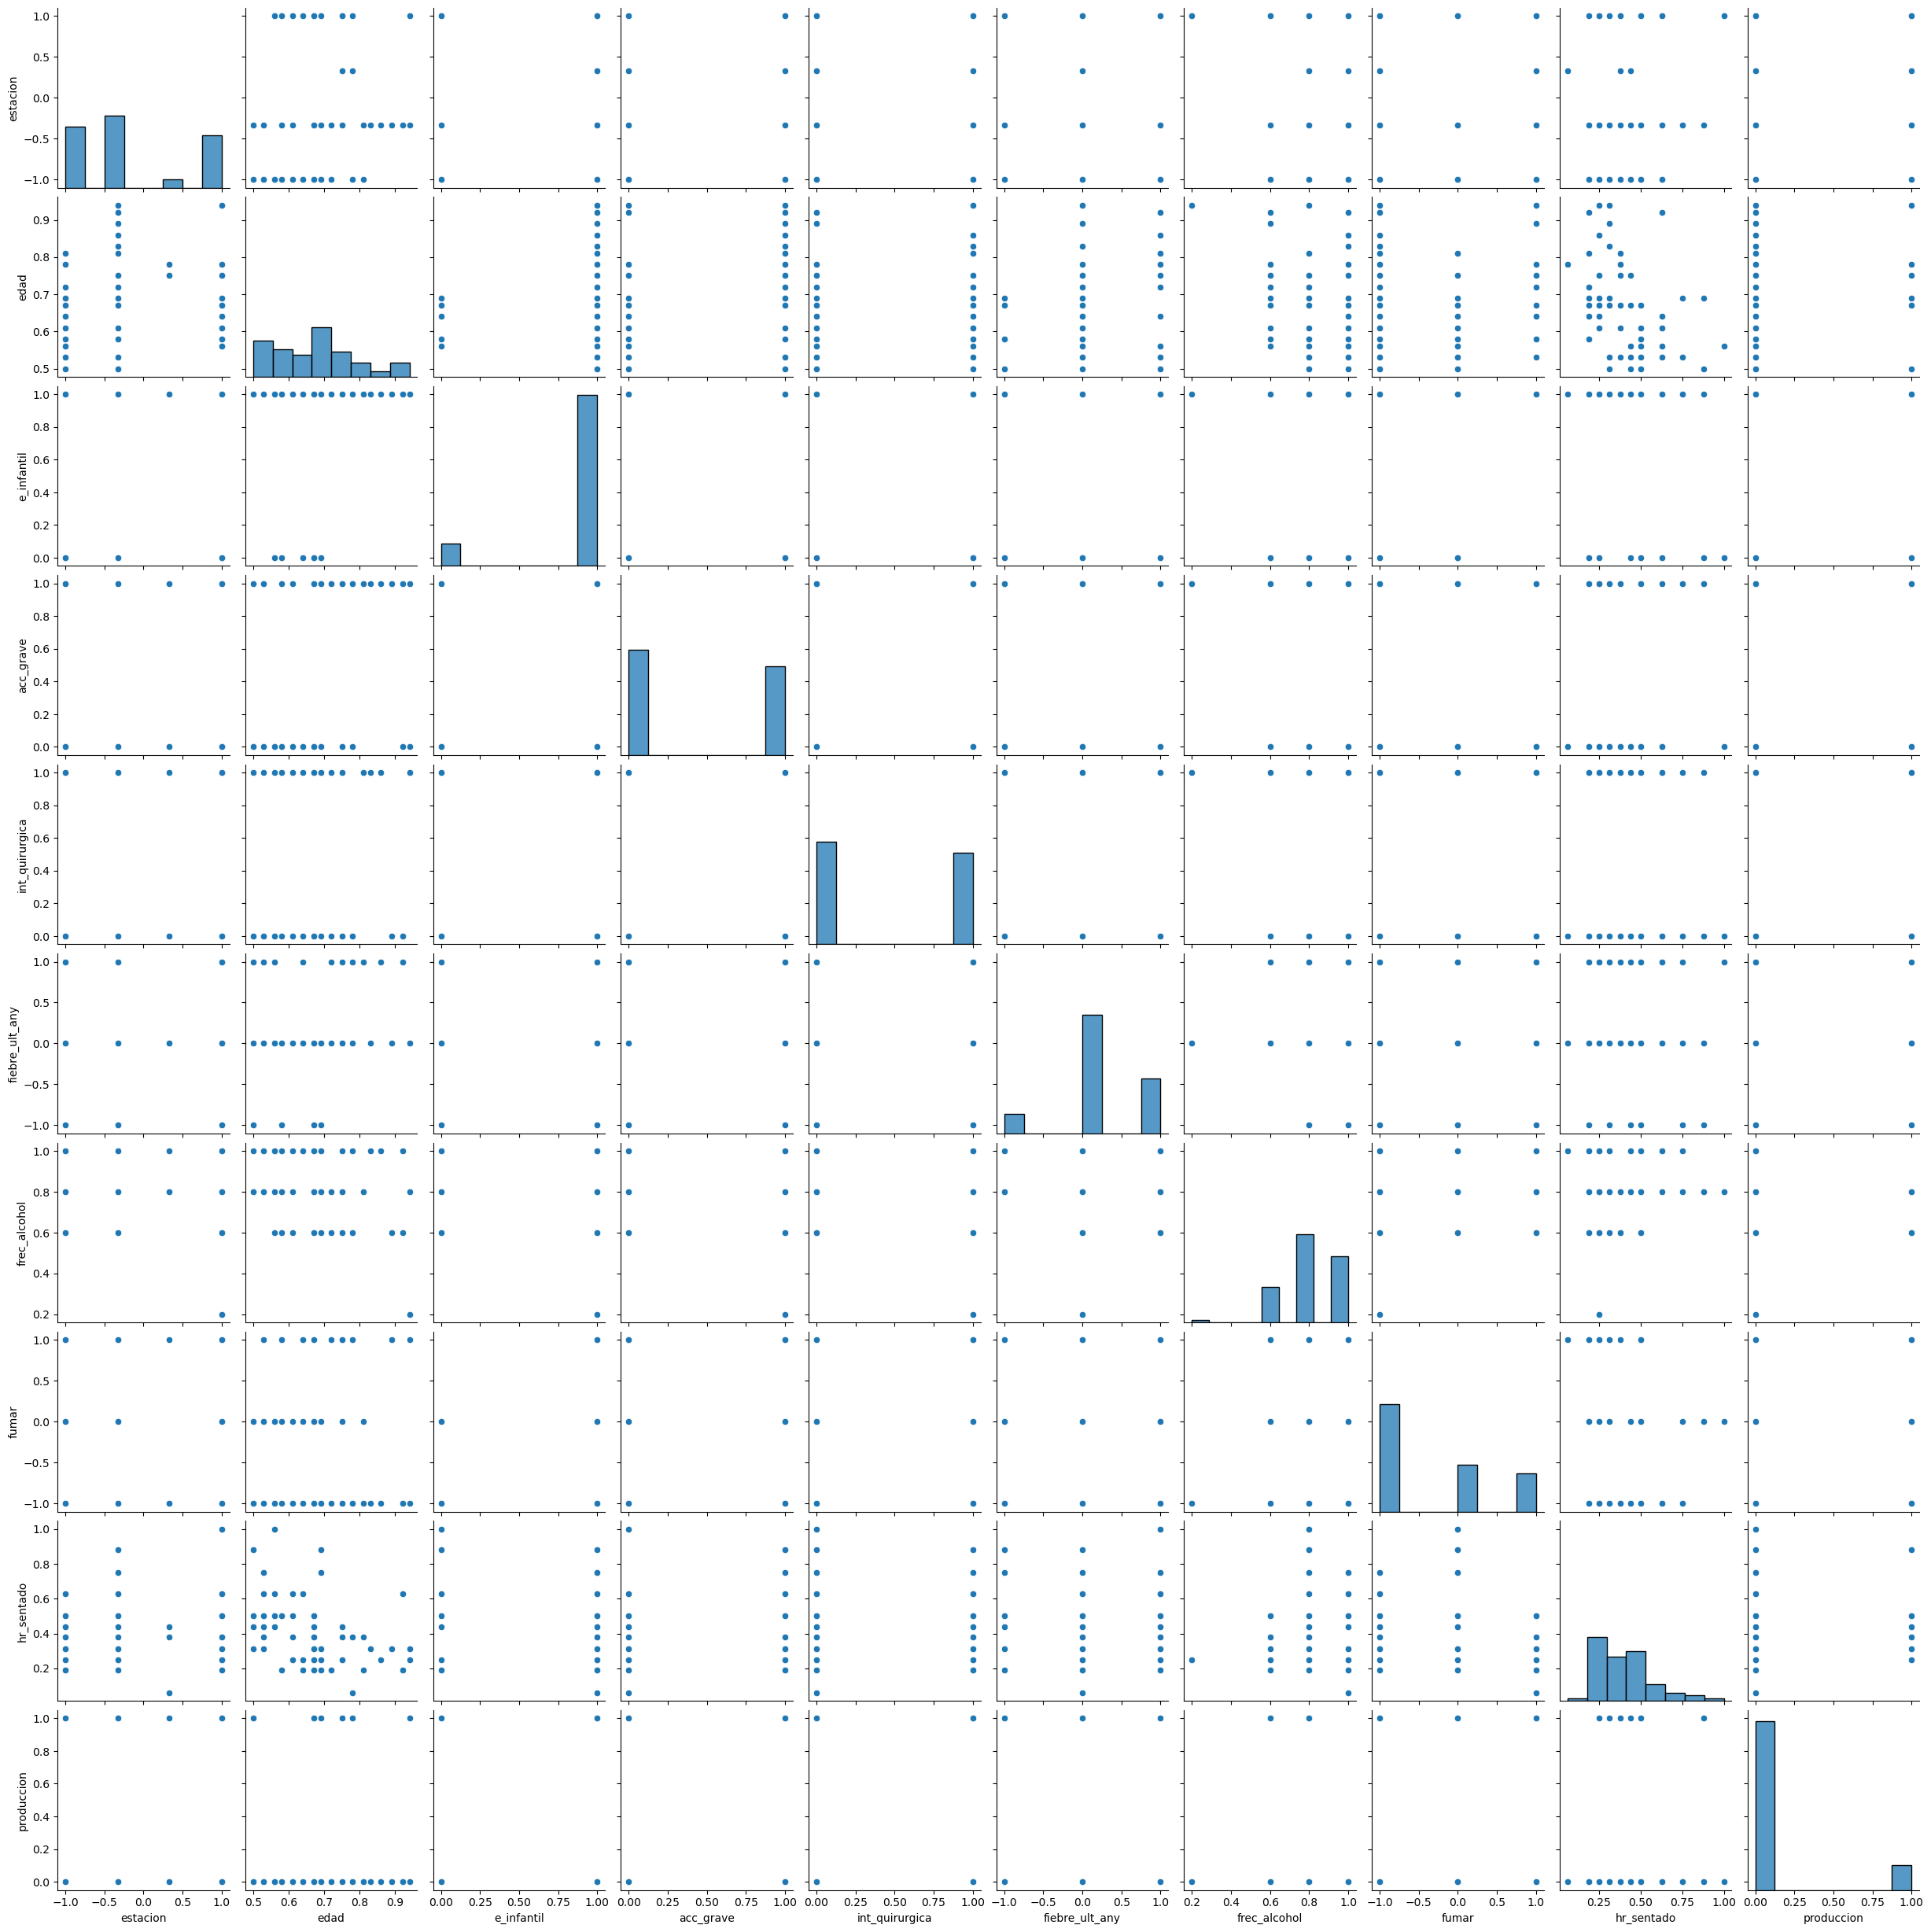

In [14]:
sns.pairplot(df);

In [15]:
df.corr()

,estacion,edad,e_infantil,acc_grave,int_quirurgica,fiebre_ult_any,frec_alcohol,fumar,hr_sentado,produccion
estacion,1.000000,0.178577,-0.146864,-0.114341,-0.047626,-0.176012,-0.170075,0.027660,-0.072354,0.202614
edad,0.178577,1.000000,0.057124,0.289660,0.220863,0.102641,-0.289938,0.038175,-0.402714,0.132937
e_infantil,-0.146864,0.057124,1.000000,0.149366,-0.110510,0.112565,0.051153,0.121261,-0.200712,0.003833
acc_grave,-0.114341,0.289660,0.149366,1.000000,0.109972,0.051153,-0.202144,0.051630,-0.034575,-0.095464
int_quirurgica,-0.047626,0.220863,-0.110510,0.109972,1.000000,-0.247654,-0.063168,0.028339,-0.187612,0.064734
fiebre_ult_any,-0.176012,0.102641,0.112565,0.051153,-0.247654,1.000000,0.015447,-0.101988,-0.058089,-0.120368
frec_alcohol,-0.170075,-0.289938,0.051153,-0.202144,-0.063168,0.015447,1.000000,-0.160241,0.147517,-0.214237
fumar,0.027660,0.038175,0.121261,0.051630,0.028339,-0.101988,-0.160241,1.000000,-0.146999,0.011526
hr_sentado,-0.072354,-0.402714,-0.200712,-0.034575,-0.187612,-0.058089,0.147517,-0.146999,1.000000,0.087418
produccion,0.202614,0.132937,0.003833,-0.095464,0.064734,-0.120368,-0.214237,0.011526,0.087418,1.000000


No se detecta correlaciones fuertes entre variables

## GUARDAR DATASETS TRAS CALIDAD DE DATOS

In [71]:
df.to_pickle('../../02_Datos/03_Trabajo/df_tablon.pickle')